# Daisyworld: Some visualisations

In [ ]:
# Imports:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate


The idea is to model the system of ODEs:
$$\dot{B} = -T + 1/2 - B$$
$$\dot{W} = T + 1/2 + W$$
$$\dot{T} = k - 1/2 + B/2 - W/2$$

In [32]:
# Define this as a function. Note function signature determined by scipy
k = 0.5

def system(t, y):
    B, W, T = y
    B_dot = - T + 0.5 - B
    W_dot = T + 0.5 - W
    T_dot = k - 0.5 + 0.5 * B - 0.5 * W
    # Silly hack so that species die out
    return (B_dot, W_dot, T_dot)

In [33]:
# ODE solver
t_f = 10 # Final time
B0 = 0.25
W0 = 0.75
T0 = 0.125
solution = integrate.solve_ivp(system, (0, t_f), y0 = (B0, W0, T0),
                               dense_output=True,
                               max_step=0.2)

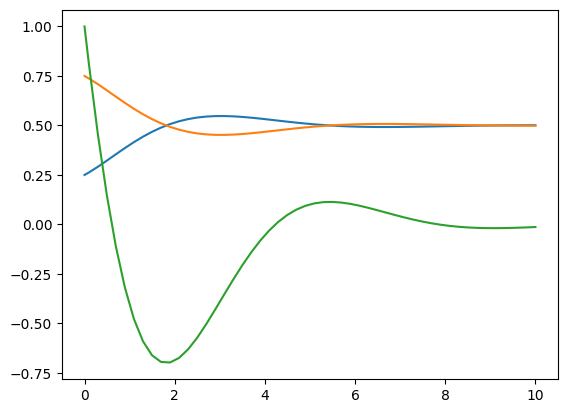

In [36]:
plt.cla()
plt.plot(solution.t, solution.y[0,])
plt.plot(solution.t, solution.y[1,])
plt.plot(solution.t, solution.y[2,] / max(solution.y[2,]))
plt.show()